In [4]:
import pandas as pd
import numpy as np
import pickle
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Preprocess the data to improve data! There is not enough variance hence cant seperate classes!

In [5]:
df = pd.read_csv("recipe_train.csv")

# Preprocess

### Importing count vectorizer

In [65]:
# Count vectorizer
vocab = pickle.load(open("recipe_text_features_countvec/train_name_countvectorizer.pkl", "rb"))

In [73]:
vocab_dict = vocab.vocabulary_
len(vocab_dict)

10892

In [67]:
import scipy
spares_recipe_name = scipy.sparse.load_npz('recipe_text_features_countvec/train_name_vec.npz')

In [78]:
recipe_name = spares_recipe_name.toarray()
recipe_name

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [70]:
for i in range(len(recipe_name[0])):
    if recipe_name[0][i]!=0:
        print(recipe_name[0][i], end=" ")
        print(i)

1 1976
1 2916
1 3871
1 4437
1 8202
1 9458
1 10597


### Importing doc2vec files

Creating dataset

In [6]:
heading_name = []
heading_steps = []
heading_ingr = []
for i in range(100):
    heading_name.append("name"+str(i))
    heading_steps.append("steps"+str(i))
    heading_ingr.append("ingr"+str(i))
    
recipe_train = pd.read_csv('recipe_train.csv')
n_steps = recipe_train['n_steps']
n_ingr = recipe_train['n_ingredients']
duration_label = recipe_train['duration_label']

name = pd.read_csv('recipe_text_features_doc2vec100/train_name_doc2vec100.csv', names=heading_name)
steps = pd.read_csv('recipe_text_features_doc2vec100/train_steps_doc2vec100.csv', names=heading_steps)
ingr = pd.read_csv('recipe_text_features_doc2vec100/train_ingr_doc2vec100.csv', names=heading_ingr)

data = name.join(steps).join(ingr).join(n_steps).join(n_ingr)
labeled_data = name.join(steps).join(ingr).join(n_steps).join(n_ingr).join(duration_label)

In [5]:
data

,name0,name1,name2,name3,name4,name5,name6,name7,name8,name9,...,ingr92,ingr93,ingr94,ingr95,ingr96,ingr97,ingr98,ingr99,n_steps,n_ingredients
0,-0.138903,-0.105632,0.211538,0.184168,-0.060962,0.158132,0.183160,-0.047310,-0.094243,-0.190823,...,-0.250643,0.214695,-0.018045,0.395938,-0.057779,0.336876,0.230647,0.143468,6,12
1,0.050503,-0.009516,0.103751,0.001047,-0.077112,0.064507,-0.077452,0.008811,0.011587,-0.273610,...,-0.122143,-0.188637,0.096245,0.296148,0.098384,-0.124963,-0.195799,-0.210086,9,5
2,0.017546,-0.065912,0.018216,-0.136358,-0.157555,0.012741,-0.090726,-0.172800,-0.013132,-0.139782,...,0.127930,-0.271923,-0.188931,-0.154470,-0.174869,-0.341245,-0.060525,0.080168,15,10
3,-0.192465,0.100614,-0.135092,-0.045592,-0.084184,0.011720,-0.273193,-0.112106,-0.342789,-0.048324,...,-0.259047,0.107682,-0.259195,-0.065767,-0.065660,-0.207306,-0.167152,0.492161,10,8
4,0.294862,0.072540,-0.079729,-0.123215,-0.006412,-0.029505,0.014645,0.058601,0.113420,-0.282019,...,0.131887,0.215795,0.119587,-0.063841,-0.107087,-0.281038,-0.136156,0.063560,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.079531,-0.152311,-0.108301,0.245858,0.027275,0.123829,0.170607,-0.097053,-0.195209,-0.161817,...,-0.110938,0.007777,-0.021177,0.016590,-0.189764,-0.068398,-0.190228,0.083059,6,13
39996,0.175133,-0.062132,-0.037974,-0.036284,-0.065828,0.023028,-0.064448,-0.003984,-0.072117,-0.204766,...,-0.019811,0.015345,0.050862,0.087614,0.594146,0.507868,0.109975,-0.047240,15,16
39997,0.056546,0.125747,-0.161598,0.088675,-0.130160,-0.099027,-0.086974,-0.129478,-0.043179,-0.026247,...,0.111844,0.219837,0.034625,0.033108,-0.518219,0.229315,-0.024256,-0.351173,5,8
39998,-0.001341,0.042503,0.026502,0.187291,0.063780,0.078871,-0.180524,-0.104264,0.017374,-0.337967,...,-0.157026,-0.158611,0.375092,0.225296,-0.409948,-0.642923,0.512482,-0.925799,7,17


# xgBoost

In [7]:
import xgboost as xgb

In [8]:
xgbc = xgb.XGBClassifier()

In [ ]:
cross_val_score(xgbc, data, duration_label, cv=3)

## Parameter tuning test

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(data, duration_label, test_size=0.2)

In [18]:
start = time.time()

xgbc.fit(X_train, Y_train)

fin = time.time()

print(fin-start, 'seconds')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:59:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
119.25272226333618 seconds


In [15]:
xgbc.score(X_test, Y_test)

0.717

In [8]:
xgbc_eta1 = xgb.XGBClassifier(learning_rate = 0.1)

In [ ]:
start = time.time()

xgbc_eta1.fit(X_train, Y_train)

fin = time.time()

print(fin-start, 'seconds')

In [ ]:
xgbc_eta1.score(X_test, Y_test)

In [12]:
xgbc_eta2 = xgb.XGBClassifier(learning_rate = 0.2)

In [12]:
start = time.time()

xgbc_eta2.fit(X_train, Y_train)

fin = time.time()

print(fin-start, 'seconds')

[21:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
224.28854656219482


In [13]:
xgbc_eta2.score(X_test, Y_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.7185

Check for overfitting

In [42]:
xgbc_eta2.score(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.94578125

In [50]:
xgbc_colsam1 = xgb.XGBClassifier(learning_rate = 0.2, colsample_bytree = 0.3)

In [51]:
start = time.time()

xgbc_colsam1.fit(X_train, Y_train)

fin = time.time()

print(fin-start, 'seconds')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
44.88545870780945 seconds


In [52]:
xgbc_colsam1.score(X_test, Y_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.717625

Check for overfitting

In [53]:
xgbc_colsam1.score(X_train, Y_train)

0.93796875

In [ ]:
learning_rate_range = np.arange(0.1, 0.35, 0.05)
max_depth_range = np.arange(3,16,1)
min_child_weight_range = np.arange(1,9,2)
gamma_range = np.arange(0, 0.5, 0.1)
colsample_bytree_range = np.arange(0.3, 0.8, 0.1)

## Feature selection

test with feature n_steps and n_ingredients only

In [10]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(data[['n_steps', 'n_ingredients']], duration_label, test_size=0.2)

In [13]:
start = time.time()

xgbc_eta2.fit(X_train2, Y_train2)

fin = time.time()

print(fin-start, 'seconds')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.4029359817504883 seconds


In [15]:
xgbc_eta2.score(X_test2, Y_test2)

0.6365

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

## Parameter tuning

In [25]:
lrc = LogisticRegression(solver = 'saga')

In [26]:
start = time.time()

lrc.fit(X_train, Y_train)

fin = time.time()

print(fin-start, 'seconds')

41.13733434677124 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [28]:
lrc.score(X_test, Y_test)

0.7275

In [29]:
lrc1 = LogisticRegression()

In [30]:
start = time.time()

lrc1.fit(X_train, Y_train)

fin = time.time()

print(fin-start, 'seconds')

3.728337049484253 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
lrc1.score(X_test, Y_test)

0.725625

In [37]:
lrc2 = LogisticRegression(max_iter = 1000)

In [38]:
start = time.time()

lrc2.fit(X_train, Y_train)

fin = time.time()

print(fin-start, 'seconds')

40.66108751296997 seconds


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
lrc2.score(X_test, Y_test)

0.728

In [39]:
lrc3 = LogisticRegression(max_iter = 10000)

In [40]:
start = time.time()

lrc3.fit(X_train, Y_train)

fin = time.time()

print(fin-start, 'seconds')

40.8420729637146 seconds


In [41]:
lrc3.score(X_test, Y_test)

0.728125

Check for overfiiting

In [43]:
lrc3.score(X_train, Y_train)

0.7348125

# Testing

## test classifier on iris dataset

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
x = load_iris()

cross_val_score(xgbc, x.data, x.target, cv=3)

## compare different models on a selected set of feature(s)

In [2]:
from sklearn.naive_bayes import GaussianNB

In [3]:
gnb = GaussianNB()

In [16]:
start = time.time()

gnb.fit(X_train2, Y_train2)

fin = time.time()

print(fin-start, 'seconds')

0.008998870849609375 seconds


In [17]:
gnb.score(X_test2, Y_test2)

0.619875

## Perform custom binning on n_steps and n_ingredients

In [19]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [40]:
n_steps_fast = labeled_data.loc[labeled_data['duration_label'] == 1].loc[:,['n_steps']].squeeze().array

In [52]:
n_steps_fast_mean = np.mean(n_steps_fast)

In [45]:
n_steps_fast_std = np.std(n_steps_fast)

In [46]:
n_steps_med = labeled_data.loc[labeled_data['duration_label'] == 2].loc[:,['n_steps']].squeeze().array

In [47]:
n_steps_med_mean = np.mean(n_steps_med)

In [48]:
n_steps_med_std = np.std(n_steps_med)

In [49]:
n_steps_slow = labeled_data.loc[labeled_data['duration_label'] == 3].loc[:,['n_steps']].squeeze().array

In [50]:
n_steps_slow_mean = np.mean(n_steps_slow)

In [51]:
n_steps_slow_std = np.std(n_steps_slow)

In [24]:
n_ingredients_fast = labeled_data.loc[labeled_data['duration_label'] == 1].loc[:,['n_steps']].squeeze().array

In [25]:
n_ingredients_med = labeled_data.loc[labeled_data['duration_label'] == 2].loc[:,['n_steps']].squeeze().array

In [26]:
n_ingredients_slow = labeled_data.loc[labeled_data['duration_label'] == 3].loc[:,['n_steps']].squeeze().array

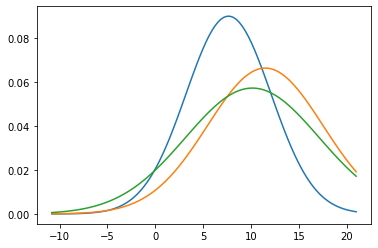

In [56]:
# from https://stackoverflow.com/questions/10138085/python-plot-normal-distribution

x = np.linspace(n_steps_slow_mean - 3*n_steps_slow_std, n_steps_fast_mean + 3*n_steps_fast_std, 100)
plt.plot(x, stats.norm.pdf(x, n_steps_fast_mean, n_steps_fast_std))
plt.plot(x, stats.norm.pdf(x, n_steps_med_mean, n_steps_med_std))
plt.plot(x, stats.norm.pdf(x, n_steps_slow_mean, n_steps_slow_std))
plt.show()

# Perform custom doc2vec (tfidf)